# Week 1: Multiple Output Models using the Keras Functional API

## Imports

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

## Load Dataset

In [13]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



# URL of the white wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# load the dataset from the URL
white_df = pd.read_csv(URL, sep=";")

# fill the `is_red` column with zeros.
white_df["is_red"] = 0

# keep only the first of duplicate items
white_df = white_df.drop_duplicates(keep='first')

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

def test_loop(test_cases):
    
    success = 0
    fails = 0
    
    for test_case in test_cases:
        try:
            assert test_case["result"] == test_case["expected"]
            success += 1
    
        except:
            fails += 1
            print(f'{test_case["name"]}: {test_case["error_message"]}\nExpected: {test_case["expected"]}\nResult: {test_case["result"]}\nPlease open utils.py if you want to see the unit test here.\n')

    if fails == 0:
        print("\033[92m All public tests passed")

    else:
        print('\033[92m', success," Tests passed")
        print('\033[91m', fails, " Tests failed")
        raise Exception(test_case["error_message"])
        
def test_white_df(white_df):
    
    test_cases = [
        {
            "name": "type_check",
            "result": type(white_df.is_red[0]),
            "expected": np.int64,
            "error_message": f'white_df.is_red has an incorrect type.'
        },
        {
            "name": "output_check",
            "result": white_df.is_red[0],
            "expected": 0,
            "error_message": "white_df.is_red is not set correctly"
        },
        {
            "name": "len_check",
            "result": len(white_df),
            "expected": 3961,
            "error_message": "Number of rows is incorrect. Please drop duplicates."
        }
    ]
    
    test_loop(test_cases)
    
def test_red_df(red_df):
    
    test_cases = [
        {
            "name": "type_check",
            "result": type(red_df.is_red[0]),
            "expected": np.int64,
            "error_message": f'red_df.is_red has an incorrect type.'
        },
        {
            "name": "output_check",
            "result": red_df.is_red[0],
            "expected": 1,
            "error_message": "red_df.is_red is not set correctly"
        },
        {
            "name": "len_check",
            "result": len(red_df),
            "expected": 1359,
            "error_message": "Number of rows is incorrect. Please drop duplicates."
        }
    ]
    
    test_loop(test_cases)
    
def test_df_drop(df):
    
    test_cases = [
        {
            "name": "df.alcohol[0]_check",
            "result": df.alcohol[0],
            "expected": 9.4,
            "error_message": f'Value is not as expected. Please check quality interval.'
        },
        {
            "name": "df.alcohol[100]_check",
            "result": df.alcohol[100],
            "expected": 10.9,
            "error_message": f'Value is not as expected. Please check quality interval.'
        }
    ]
    
    test_loop(test_cases)

def test_data_sizes(train_size, test_size, val_size):
    
    test_cases = [
        {
            "name": "train_test_size_check",
            "result": train_size > test_size,
            "expected": True,
            "error_message": f'train.size is too small. Please check implementation.'
        },
        {
            "name": "train_val_size_check",
            "result": train_size > val_size,
            "expected": True,
            "error_message": f'train.size is too small. Please check implementation.'
        },
        {
            "name": "test_val_size_check",
            "result": test_size > val_size,
            "expected": True,
            "error_message": f'test.size is too small. Please check implementation.'
        }
    ]
    
    test_loop(test_cases)

def test_format_output(df, train_Y, val_Y, test_Y):
    
    train, test = train_test_split(df, test_size=0.2, random_state=1)
    train, val = train_test_split(train, test_size=0.2, random_state=1)
    
    test_cases = [
        {
            "name": "train_Y[0]_check",
            "result": np.all(train_Y[0] == np.array(train.quality)),
            "expected": True,
            "error_message": f'train_Y[0] is not equal to train.quality. Please check implementation.'
        },
        {
            "name": "train_Y[1]_check",
            "result": np.all(train_Y[1] == np.array(train.is_red)),
            "expected": True,
            "error_message": f'train_Y[1] is not equal to train.is_red. Please check implementation.'
        },
        {
            "name": "val_Y[0]_check",
            "result": np.all(val_Y[0] == np.array(val.quality)),
            "expected": True,
            "error_message": f'train_Y[0] is not equal to val.quality. Please check implementation.'
        },
        {
            "name": "val_Y[1]_check",
            "result": np.all(val_Y[1] == np.array(val.is_red)),
            "expected": True,
            "error_message": f'train_Y[1] is not equal to val.is_red. Please check implementation.'
        },
        {
            "name": "test_Y[0]_check",
            "result": np.all(test_Y[0] == np.array(test.quality)),
            "expected": True,
            "error_message": f'test_Y[0] is not equal to test.quality. Please check implementation.'
        },
        {
            "name": "test_Y[1]_check",
            "result": np.all(test_Y[1] == np.array(test.is_red)),
            "expected": True,
            "error_message": f'test_Y[1] is not equal to test.is_red. Please check implementation.'
        }
    ]
    
    test_loop(test_cases)

def test_norm(norm_train_X, norm_val_X, norm_test_X, train, val, test):
    
    from pandas.core.frame import DataFrame
    
    test_cases = [
        {
            "name": "norm_train_X_type_check",
            "result": type(norm_train_X),
            "expected": DataFrame,
            "error_message": f'norm_train_X has an incorrect type.'
        },
        {
            "name": "norm_val_X_type_check",
            "result": type(norm_val_X),
            "expected": DataFrame,
            "error_message": f'norm_val_X has an incorrect type.'
        },
        {
            "name": "norm_test_X_type_check",
            "result": type(norm_test_X),
            "expected": DataFrame,
            "error_message": f'norm_test_X has an incorrect type.'
        },
        {
            "name": "norm_train_X_length_check",
            "result": len(norm_train_X),
            "expected": len(train),
            "error_message": f'norm_train_X has an incorrect length.'
        },
        {
            "name": "norm_val_X_length_check",
            "result": len(norm_val_X),
            "expected": len(val),
            "error_message": f'norm_val_X has an incorrect length.'
        },
        {
            "name": "norm_test_X_length_check",
            "result": len(norm_test_X),
            "expected": len(test),
            "error_message": f'norm_test_X has an incorrect length.'
        },
    ]
    
    test_loop(test_cases)

def test_base_model(base_model):
    
    test_inputs = tf.keras.layers.Input(shape=(11,))
    test_output = base_model(test_inputs)
    test_model = Model(inputs=test_inputs, outputs=test_output)

    test_cases = [
        {
            "name": "return_type_check",
            "result": type(test_output),
            "expected": tf.Tensor,
            "error_message": 'Return type is incorrect. Please check implementation.'
        },
        {
            "name": "return_shape_check",
            "result": str(test_output.shape),
            "expected": '(None, 128)',
            "error_message": 'Return shape is incorrect. Please check implementation.'
        },
        {
            "name": "tensor_dtype_check",
            "result": str(test_output.dtype),
            "expected": "<dtype: 'float32'>",
            "error_message": 'model dtype is incorrect. Please check implementation.'
        },
        {
            "name": "base_model_num_layers_check",
            "result": len(test_model.layers),
            "expected": 3,
            "error_message": 'There are too many layers. Please check implementation.'
        },
        {
            "name": "base_model_layer1_check",
            "result": type(test_model.layers[-2]),
            "expected": Dense,
            "error_message": 'First layer type is incorrect. Please check implementation.'
        },
        {
            "name": "base_model_layer2_check",
            "result": type(test_model.layers[-1]),
            "expected": Dense,
            "error_message": 'Output layer type is incorrect. Please check implementation.'
        },
    ]
    
    test_loop(test_cases)

def test_final_model(final_model):
    
    test_inputs = tf.keras.layers.Input(shape=(11,))
    test_output = final_model(test_inputs)

    test_cases = [
        {
            "name": "return_type_check",
            "result": type(test_output),
            "expected": tf.keras.Model,
            "error_message": 'Return type is incorrect. Please check implementation.'
        },
        {
            "name": "layer_3_activation_check",
            "result": test_output.layers[4].activation,
            "expected": tf.keras.activations.sigmoid,
            "error_message": 'wine_quality layer has an incorrect activation. Please check implementation.'
        },
    ]
    
    test_loop(test_cases)
    
def test_model_compile(model):

    from tensorflow.python.keras.metrics import MeanMetricWrapper

    test_cases = [
        {
            "name": "metrics_0_check",
            "result": type(model.metrics[0]),
            "expected": tf.keras.metrics.RootMeanSquaredError,
            "error_message": 'wine quality metrics is incorrect. Please check implementation.'
        },
        {
            "name": "metrics_1_check",
            "result": (model.metrics[1].name == 'wine_type_accuracy') or 
                      (model.metrics[1].name == 'wine_type_binary_accuracy'),
            "expected": True,
            "error_message": f'wine type metrics: {model.metrics[1].name} is incorrect. Please check implementation.'
        },
        {
            "name": "wine_type_loss_check",
            "result": (model.loss['wine_type'] == 'binary_crossentropy') or 
                      (model.loss['wine_type'].name == 'binary_crossentropy') or 
                      (str(model.loss['wine_type']).split()[1] == 'binary_crossentropy'),
            "expected": True,
            "error_message": f'wine type loss: {model.loss["wine_type"]} is incorrect. Please check implementation.'
        },
        {
            "name": "wine_quality_loss_check",
            "result": (model.loss['wine_quality'] in ['mse', 'mean_squared_error']) or 
                      (str(model.loss['wine_quality']).split()[1] == 'mean_squared_error') or 
                      (model.loss['wine_quality'].name == 'mean_squared_error'),
            "expected": True,
            "error_message": f'wine quality loss: {model.loss["wine_type"]} is incorrect. Please check implementation.'
        },
    ]
    
    test_loop(test_cases)
    
def test_history(history):

    vars_history = vars(history)
    
    test_cases = [
        {
            "name": "type_check",
            "result": type(history),
            "expected": tf.keras.callbacks.History,
            "error_message": 'history type is incorrect. Please check model.fit().'
        },
        {
            "name": "params_samples_check",
            "result": vars_history['params']['samples'],
            "expected": 3155,
            "error_message": 'Training samples is incorrect. Please check arguments to model.fit().'
        },
        {
            "name": "params_do_validation_check",
            "result": vars_history['params']['do_validation'],
            "expected": True,
            "error_message": 'No validation data is present. Please check arguments to model.fit().'
        },
    ]
    
    test_loop(test_cases)

In [15]:
print(white_df.alcohol[0])
print(white_df.alcohol[100])

8.8
9.1


## Pre-process the red wine dataset (TODO)

In [16]:
# Please uncomment all lines in this cell and replace those marked with `# YOUR CODE HERE`.
# You can select all lines in this code cell with Ctrl+A (Windows/Linux) or Cmd+A (Mac), then press Ctrl+/ (Windows/Linux) or Cmd+/ (Mac) to uncomment.



# URL of the red wine dataset
URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

# load the dataset from the URL
red_df = pd.read_csv(URL, sep=";")

# fill the `is_red` column with ones.
red_df["is_red"] = 1

# keep only the first of duplicate items
red_df = red_df.drop_duplicates(keep='first')

In [17]:
print(red_df.alcohol[0])
print(red_df.alcohol[100])

9.4
10.2


## Concatenate the datasets

In [18]:
df = pd.concat([red_df, white_df], ignore_index=True)

In [19]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
9.5


<Axes: >

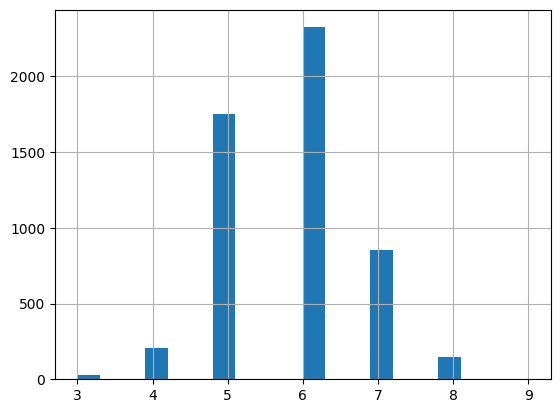

In [20]:
df['quality'].hist(bins=20)

## Imbalanced data (TODO)

In [21]:
# get data with wine quality greater than 4 and less than 8
df = df[(df['quality'] > 4) & (df['quality'] < 8 )]

# reset index and drop the old one
df = df.reset_index(drop=True)

In [22]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
10.9


<Axes: >

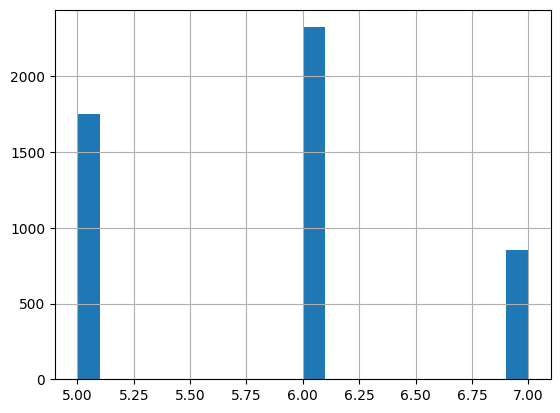

In [24]:
df['quality'].hist(bins=20)

## Train Test Split (TODO)

In [25]:
# split df into 80:20 train and test sets
train, test = train_test_split(df, test_size=.2, random_state = 1)
                               
# split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=.2, random_state = 1)

In [26]:
test_data_sizes(train.size, test.size, val.size)

 All public tests passed


In [27]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()

In [28]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


## Get the labels (TODO)

In [29]:
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [30]:
# format the output of the train set
train_Y = format_output(train)

# format the output of the val set
val_Y = format_output(val)
    
# format the output of the test set
test_Y = format_output(test)

In [31]:
test_format_output(df, train_Y, val_Y, test_Y)

 All public tests passed


In [32]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
1740,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8
1221,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9


## Normalize the data (TODO)

In [33]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [34]:
# normalize the train set
norm_train_X = norm(train)
    
# normalize the val set
norm_val_X = norm(val)
    
# normalize the test set
norm_test_X = norm(test)

In [35]:
test_norm(norm_train_X, norm_val_X, norm_test_X, train, val, test)

 All public tests passed


## Define the Model (TODO)

In [36]:
def base_model(inputs):
    
    # connect a Dense layer with 128 neurons and a relu activation
    x = Dense(128, activation='relu')(inputs)
    
    # connect another Dense layer with 128 neurons and a relu activation
    x = Dense(128, activation='relu')(x)
    return x

In [37]:
test_base_model(base_model)

return_type_check: Return type is incorrect. Please check implementation.
Expected: <class 'tensorflow.python.framework.tensor.Tensor'>
Result: <class 'keras.src.backend.common.keras_tensor.KerasTensor'>
Please open utils.py if you want to see the unit test here.

tensor_dtype_check: model dtype is incorrect. Please check implementation.
Expected: <dtype: 'float32'>
Result: float32
Please open utils.py if you want to see the unit test here.

 4  Tests passed
 2  Tests failed


Exception: Output layer type is incorrect. Please check implementation.

## Define output layers of the model (TODO)

In [38]:
def final_model(inputs):
    
    # get the base model
    x = base_model(inputs)

    # connect the output Dense layer for regression
    wine_quality = Dense(units='1', name='wine_quality')(x)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    wine_type = Dense(units='1', activation='sigmoid', name='wine_type')(x)

    # define the model using the input and output layers
    model = Model(inputs=inputs, outputs=[wine_quality, wine_type])

    return model

In [39]:
test_final_model(final_model)

ValueError: Cannot convert '(128, '1')' to a shape. Found invalid entry '1' of type '<class 'str'>'. 

In [41]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model = final_model(inputs)

model.compile(optimizer=rms, 
              loss = {'wine_type' : 'binary_crossentropy',
                      'wine_quality' : 'mean_squared_error'
                     },
              metrics = {'wine_type' : 'accuracy',
                         'wine_quality': tf.keras.metrics.RootMeanSquaredError()
                       }
             )

ValueError: Cannot convert '(128, '1')' to a shape. Found invalid entry '1' of type '<class 'str'>'. 